# Описание проекта и импорт данных

## Описание проекта

**Заказчик** – развлекательное приложение Procrastinate Pro+.

**Проблема** – Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки.

**Задача** – разобраться в причинах и предложить варианты, что нужно изменить, чтобы выйти в плюс.

**Нужно изучить**:
* откуда приходят пользователи и какими устройствами они пользуются,
* сколько стоит привлечение пользователей из различных рекламных каналов;
* сколько денег приносит каждый клиент,
* когда расходы на привлечение клиента окупаются,
* какие факторы мешают привлечению клиентов

## Описание данных

В нашем распоряжении три датасета:
* **`visits_info_short.csv`** хранит лог сервера с информацией о посещениях сайта,
* **`orders_info_short.csv`** — информацию о покупках,
* **`costs_info_short.csv`** — информацию о расходах на рекламу.

Структура visits_**`info_short.csv`**:
* `User Id` — уникальный идентификатор пользователя,
* `Region` — страна пользователя,
* `Device` — тип устройства пользователя,
* `Channel` — идентификатор источника перехода,
* `Session Start` — дата и время начала сессии,
* `Session End` — дата и время окончания сессии.

Структура orders_**`info_short.csv`**:
* `User Id` — уникальный идентификатор пользователя,
* `Event Dt` — дата и время покупки,
* `Revenue` — сумма заказа.

Структура **`costs_info_short.csv`**:
* `Channel` — идентификатор рекламного источника,
* `Dt` — дата проведения рекламной кампании,
* `Costs` — расходы на эту кампанию.

## Импорт библиотек и данных

In [1]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import datetime as dt
import warnings

from functools import reduce
from datetime import datetime
from datetime import timedelta

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Настроим некоторые параметры отображения графиков
custom_params = {
    'figure.figsize': (14,6),
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.titlesize': 16,
    'axes.titleweight': 'bold',
    'axes.grid': True,
    'axes.grid.axis': 'y',
    'grid.alpha': 0.5
}
for key, val in custom_params.items():
    mpl.rcParams[key] = val

# Цвета для графиков
colors = ['#303F9F', '#F57C00','#388E3C','#C2185B','#FBC02D','#5D4037',
          '#455A64', '#D32F2F', '#1976D2', '#AFB42B', '#689F38','#512DA8','#00796B','#689F38']

In [3]:
# импортируем данные
# для локальной работы
try:
    visits = pd.read_csv('datasets/visits_info_short.csv')
    orders = pd.read_csv('datasets/orders_info_short.csv')
    costs = pd.read_csv('datasets/costs_info_short.csv')
# для jupyterhub
except:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('/datasets/costs_info_short.csv')

## Первый взгляд на данные

Для всех датасетов выведем первые 5 строк и общую информацию по данным.

In [4]:
# Смотрим на visits
display(visits.head())
visits.info()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [5]:
# Смотрим на orders
display(orders.head())
orders.info()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [6]:
# Смотрим на costs
display(costs.head())
costs.info()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


## Вывод

При первом взгляде на данные мы увидели явные проблемы с названиями столбцов и несоответствие типов данных в столбцах с датами. Из положительных моментов видно, что в данных нет пропусков.

# Предобработка данных

## Изменение названий столбцов

Мы сразу заметили, что столбцы названы некорректно: начинаются с больших букв и содержат пробелы. Для того, чтобы это исправить напишем небольшую функцию, которая будет принимать на вход датафрейм и возвращать корректные названия столбцов.

In [7]:
# функция для исправления названий столбцов
def correct_column_names(df):
    result = [col.lower().strip().replace(' ', '_') for col in df.columns]
    return result

In [8]:
# исправляем названия столбцов
visits.columns = correct_column_names(visits)
orders.columns = correct_column_names(orders)
costs.columns = correct_column_names(costs)

In [9]:
# проверяем изменения
print('Названия столбцов в visits:', ', '.join(visits.columns))
print('Названия столбцов в orders:', ', '.join(orders.columns))
print('Названия столбцов в costs:', ', '.join(costs.columns))

Названия столбцов в visits: user_id, region, device, channel, session_start, session_end
Названия столбцов в orders: user_id, event_dt, revenue
Названия столбцов в costs: dt, channel, costs


Названия столбцов исправлены.

## Изменение типов данных

Во всех таблицах присутствуют столбцы со значением дат и времени. Но тип данных у всех этих столбцов – object. Исправим это. Приведем все данные времени к формату datetime.

In [10]:
# меняем типы данных в столбцах с датами
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt'])

In [11]:
# проверяем изменения 
check = True

for col in [visits['session_start'], visits['session_end'], orders['event_dt'], costs['dt']]:
    check = col.dtype == 'datetime64[ns]'
    
if check:
    print('Все изменения приняты. У столбцов с датами тип datetime.')

Все изменения приняты. У столбцов с датами тип datetime.


## Проверка на дубликаты

Посмотрим есть ли в данных дубликаты:

In [12]:
check = True

for df in [visits, orders, costs]:
    if df.duplicated().sum() != 0 :
        check = False

print(('Есть дубликаты', 'Дубликатов нет')[check])

Дубликатов нет


В данных мы не нашли ни одного полного дубликата.

## Выводы

В этом шаге мы исправили названия столбцов: привели к нижнему регистру, заменили пробелы на нижние подчеркивания. Также мы исправили типы данных для столбцов с датами. Теперь данные готовы для анализа.

# Исследовательский анализ данных

Без понимания данных невозможно делать глубокий анализ. Поэтому главной задачей данного шага будет изучить данные, которые у нас есть. На выходе мы должны понимать: откуда пришли наши пользователи, как попали к нам, какими девайсами пользуются. Затем, с полученными знаниями мы сможем уверенно приступать к серьезному анализу данных.

**План EDA**:
1. Создадим функцию для создания пользовательских профилей;
2. Создадим пользовательские профили и определим минимальную и максимальную даты привлечения пользователей;
3. Определим из каких страх приходят пользователи и на какую страну приходится большинство платящих пользователей;
4. Узнаем какими устройствами пользуются клиенты и найдем лидера в группе платящих пользователей;
5. Изучим каналы привлечения пользователей, найдем канал, который привел больше всего платящих пользователей.

Сразу сделаем примечание, чтобы потом не запутаться. В дальнейшем исследовании пользователей, которые не являются покупателями мы будем называть – пользователи. А платящих пользователей – клиентами.

## Создание функций для анализа

### Функция для создания профилей пользователей

Первый шаг для рассчета метрик – создание профилей пользователей. Профиль пользователя это датафрейм с параметрами первого взаимодействия с продуктом: даты привлечения, устройства, канала привлечения, региона. Также в профиль добавим стоимость привлечения пользователя.

Функция принимает на вход:
* ``visits`` – журнал сессий;
* ``orders`` – данные о покупках;
* ``costs`` – затраты на рекламу;

Функция возвращает профили пользователей со всеми перечисленными выше параметрами.

In [13]:
# функция для создания профилей пользователей
def get_profiles(visits, orders, costs):
    # создаем пользовательские профили
    profiles = (
        visits.sort_values(['user_id', 'session_start'])
        .groupby('user_id')
        .agg({
            'region': 'first',
            'device': 'first',
            'channel': 'first',
            'session_start': 'first'
        })
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )
    
    # исправляем типы дат
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].dt.month
    profiles['week'] = profiles['first_ts'].dt.isocalendar().week
    
    # проверяем является ли пользователь покупателем
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())
    
    # рассчитаем стоимость привлечения и добавим ее в профили
    # найдем количество новых пользователей за каждый день и в разбивке по каналам привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
    new_users['dt'] = pd.to_datetime(new_users['dt'])

    # объединим траты на привлечение и количество новых пользователей
    ad_costs = costs.merge(
        new_users,
        on=['dt', 'channel'],
        how='left'
    )
    
    # рассчитываем cac
    ad_costs['acquisition_cost'] = (ad_costs['costs'] / ad_costs['unique_users']).round(4)
    
    # добавляем стоимость привлечения в профили
    profiles['dt'] = pd.to_datetime(profiles['dt'])
    profiles = profiles.merge(
        ad_costs[['dt','channel','acquisition_cost']],
        on=['dt','channel'],
        how='left'
    )
    
    # добавим стоимость привлечения 0 для органических пользователей
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

### Создание функций для изучения и визуализации пользователей по параметрам

Для того, чтобы упростить дальнейшее исследование, создадим функцию, которая будет строить сводную таблицу по заданному параметру. Таблице будут следующие столбцы:
* `users` – количество пользователей,
* `payers` – количество платящих пользователей,
* `users_share` – доля пользователей по заданному параметру от их общего числа,
* `payers_share` – доля платящих пользователей по заданному параметру от их общего числа.

In [14]:
# функция для исследования пользователей по заданному параметру
def research_users(param):
    result = profiles.pivot_table(
        index=param,
        values='payer',
        aggfunc=['count', 'sum']
    )

    # переименуем названия столбцов
    result.columns = ['users','payers']

    # отсортируем по убыванию количества пользователей 
    result = result.sort_values(by='users', ascending=False)

    # найдем долю пользователей для каждой страны
    result['users_share'] = ((result['users'] / result['users'].sum())
                                      .map('{:.2%}'.format))

    # найдем долю клиентов для каждой страны
    result['payers_share'] = ((result['payers'] / result['payers'].sum())
                                        .map('{:.2%}'.format))

    return result

Для получения наглядных результатов создадим функцию для визуализации полученной сводной таблицы. Она будет строить 2 столбчатые диаграммы: для количества пользователей и количества клиентов.

In [15]:
# функция для визуализации исследования пользователей по параметрам 
def plot_research_users(df, param, param_ru):
    # создаем фигуру и готовим названия оси х и самой диаграммы
    xlabel = param_ru.title()
    title = param_ru + 'ам'
    fig, ax = plt.subplots(1, 2)
    
    # строим графики для пользователей и клиентов
    for i, val in enumerate(['users', 'payers']):
        full_title = 'Количество ' + ('пользователей', 'клиентов')[val=='payers'] + ' по ' + title
        ax[i].set_title(full_title)
        ax[i].set_xlabel(xlabel, fontsize='large')
        ax[i].set_ylabel('Количество', fontsize='large')
        ax[i].bar(
            x=df.index,
            height=df[val],
            width=0.8,
            zorder=2,
            color=colors[i])
        if len(df.index) > 4:
            ax[i].tick_params(axis='x', rotation=70)
        
    plt.show()

Функции готовы, можем приступать к изучению.

## Исследование пользователей

### Создание профилей пользователей

Для начала создадим пользовательские профили и определим минимальную и максимальную даты привлечения.

In [16]:
# создание пользовательских профилей
profiles = get_profiles(visits, orders, costs)

In [17]:
# найдем минимальную и максимальную даты привлечения
print('Минимальная дата –', profiles['dt'].min())
print('Максимальная дата –', profiles['dt'].max())

Минимальная дата – 2019-05-01 00:00:00
Максимальная дата – 2019-10-27 00:00:00


### Исследование пользователей по региону

Узнаем откуда наши пользователи:

In [18]:
# исследование пользователей по регионам
research_users('region')

,users,payers,users_share,payers_share
region,,,,
United States,100002,6902,66.66%,77.72%
UK,17575,700,11.72%,7.88%
France,17450,663,11.63%,7.47%
Germany,14981,616,9.99%,6.94%


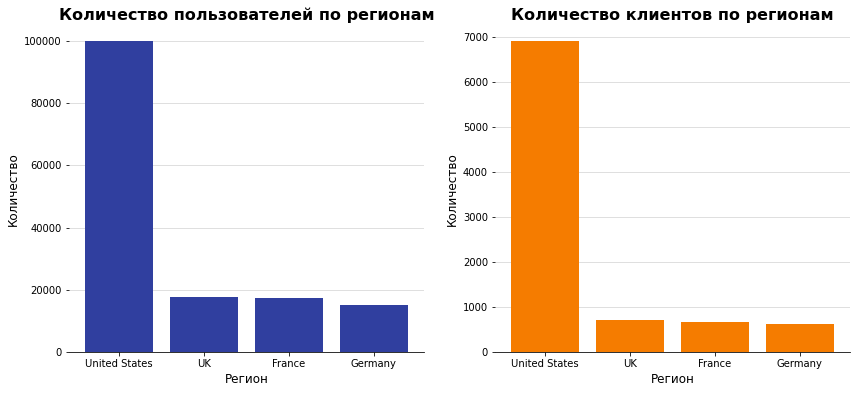

In [19]:
# визуализируем результаты 
plot_research_users(research_users('region'), 'region', 'регион')

Две третих наших пользователей пришли из США, а остальные почти поровну распределились по Великобритании, Франции и Германии. В платящих пользователях разрыв еще более выраженный – 78% клиентов из США, остальные страны имеют доли от 6,9% до 7,9%

### Исследование пользователей по устройствам

Поймем какие устройства предпочитают наши пользователи:

In [20]:
# исследование пользователей по устройствам
research_users('device')

,users,payers,users_share,payers_share
device,,,,
iPhone,54479,3382,36.32%,38.08%
Android,35032,2050,23.35%,23.08%
PC,30455,1537,20.30%,17.31%
Mac,30042,1912,20.03%,21.53%


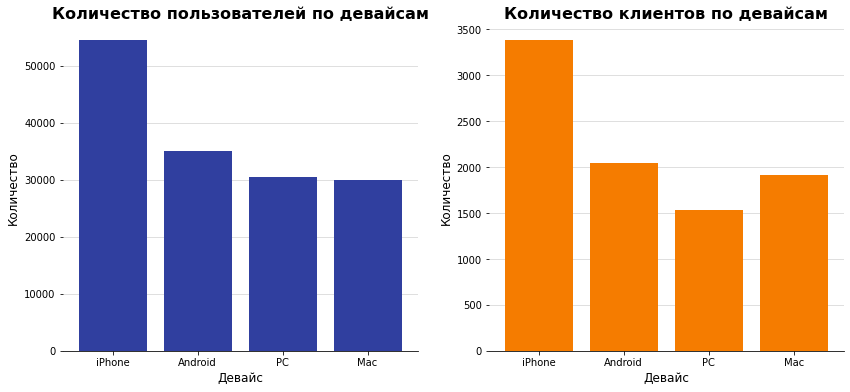

In [21]:
# визуализируем результаты 
plot_research_users(research_users('device'), 'device', 'девайс')

Большинство наших пользователей пришли с мобильных платформ – 36,3% с iPhone, 23,3% с Android. А вот доли PC и Mac почти одинаковые – 20,3% и 20,03% соответственно.

Среди платящих пользователей лидером остается все тот же iPhone, с него пришло 38% клиентов. Дальше идут Andriod и Mac, с разницей в 1,5 п.п. Android обгоняет Mac. Единственная платформа, с которой пришло менее 20% пользователей это PC.

### Исследование пользователей по каналам привлечения

Узнаем с каких каналов пришли пользователи и клиенты:

In [22]:
# исследование пользователей и клиентов по каналам привлечения
research_users('channel')

,users,payers,users_share,payers_share
channel,,,,
organic,56439,1160,37.62%,13.06%
FaceBoom,29144,3557,19.43%,40.05%
TipTop,19561,1878,13.04%,21.15%
OppleCreativeMedia,8605,233,5.74%,2.62%
LeapBob,8553,262,5.70%,2.95%
WahooNetBanner,8553,453,5.70%,5.10%
RocketSuperAds,4448,352,2.97%,3.96%
MediaTornado,4364,156,2.91%,1.76%
YRabbit,4312,165,2.87%,1.86%


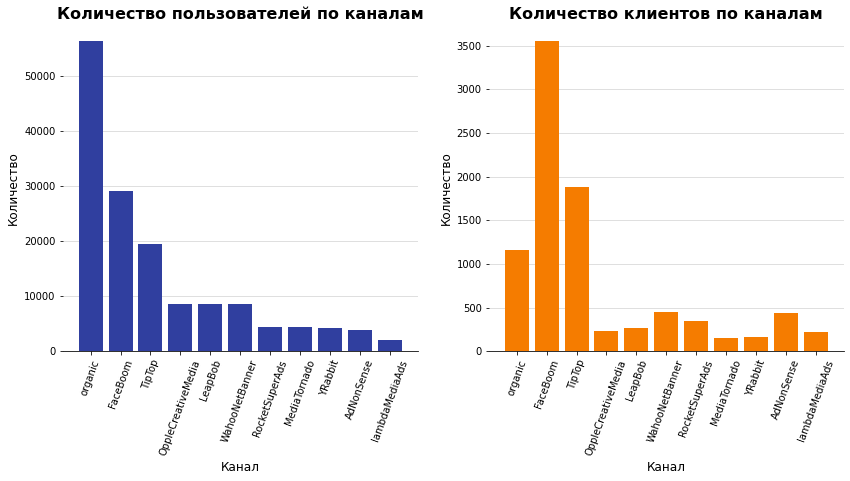

In [23]:
# визуализируем результаты 
plot_research_users(research_users('channel'), 'channel', 'канал')

В каналах привлечения очень интересная ситуация. Лидером среди привлечения пользователей является organic с долей в 37,5%, но вот среди привлечения пользователей organic располагается лишь на 3-м месте с долей клиентов в 13%. Больше всего клиентов привлекает FaceBoom, оттуда приходит 40% всех клиентов. Также крупным каналом привлечения как пользователей, так и клиентов, является TipTop. Общая доля TipTop, FaceBoom и organic среди и пользователей и клиентов – почти 75%. Остальные же каналы распределены равномерно с долями от 1,43% до 5,74% в привлечении пользователей, и от 1,76% до 5,1% в привлечении клиентов.

## Выводы

Мы построили и вуализировали таблицы по пользователям и клиентам в соответствии с регионом, девайсом и каналом привлечения. Вот какие выводы мы можем сделать:
* Две третих пользователей пришло из США, остальные распределились довольно-таки равномерно среди Великобритании, Франции и Германии. Среди клиентов наблюдается похожая картина.
* iPhone – лидер среди устройств и у пользователей, и у клиентов. Дальше с отставанием более чем в 10 п.п. идут – Android, PC, Mac. Andriod прочно занимает второе место среди пользователей и клиентов. А вот PC, по сравнению с Mac, привлекает больше пользователей, но заметно меньше клиентов. Поэтому мы можем сделать предположение, что более платежеспособная аудитория пользуется Mac.
* Всего у нас 11 каналов привлечения. Среди каналов привлечения есть 3 однозначных лидера: organic, FaceBoom, TipTop. Доля этих трех каналов привлечения 70% у пользователей и 75% у клиентов. Из остальных 8 каналов ни один не набирает более 7% среди пользователей и клиентов.

# Маркетинг

Посмотрим как работает сейчас маркетинг. Изучим подробнее каналы привлечения. Мы уже смотрели на каналы привлечения в разрезе количества пользователей, которые с них пришли. Теперь посмотрим с точки зрения затрат.

План исследования маркетинга:
1. Узнаем сколько денег мы тратим в целом на маркетинг и какое распределение этих трат по каналам. Также посмотрим сколько стоит среднее привлечение пользователя с каждого канала.
2. Затем изучим изменения показателей средних затрат во времени.
3. Напишем выводы.

Введем новый термин:

**CAC** – метрика, которая показывает сколько в среднем стоит привлечение пользователя.

## Изучение структуры расходов на маркетинг

Считаем общие расходы на маркетинг:

In [24]:
print('Общие расходы на маркетинг за весь период исследования:',  costs['costs'].sum().round())

Общие расходы на маркетинг за весь период исследования: 105497.0


Теперь построим сводную таблицу со структурой расходов по каналам привлечения:

In [25]:
# считаем количество покупателей
marketing = (
    profiles.query('payer == True')
    .groupby('channel')
    .agg({'user_id': 'count'})
    .reset_index()
    .rename(columns={'user_id': 'payers'})
)

# группируем клиентов по каналам и находим общие траты и количество пользователей
marketing = (
    marketing.merge(
        (
            profiles.groupby('channel')
            .agg({
                'acquisition_cost': 'sum',
                'user_id': 'count'})
            .reset_index()
        ),
        on='channel'
    )
    .rename(columns={
        'acquisition_cost': 'total_costs',
        'user_id': 'users' 
    })
)[:-1]

# найдем стоимость привлечения пользователя и клиента
marketing['acquisition_cost'] = marketing['total_costs'] / marketing['users']
marketing['cac'] = marketing['total_costs'] / marketing['payers']
marketing['total_costs_share'] = (marketing['total_costs'].div(marketing['total_costs'].sum())
                                  .map('{:.2%}'.format))

# расставим столбцы в логичном порядке и отсортируем по убыванию общих затрат
marketing = (marketing[['channel', 'total_costs', 'total_costs_share', 'users', 'payers',
                        'acquisition_cost', 'cac']]
            .sort_values('total_costs', ascending=False)
            .reset_index(drop=True)
            )

marketing.round(2)

,channel,total_costs,total_costs_share,users,payers,acquisition_cost,cac
0,TipTop,54751.27,51.90%,19561,1878,2.80,29.15
1,FaceBoom,32445.49,30.75%,29144,3557,1.11,9.12
2,WahooNetBanner,5151.01,4.88%,8553,453,0.60,11.37
3,AdNonSense,3911.24,3.71%,3880,440,1.01,8.89
4,OppleCreativeMedia,2151.23,2.04%,8605,233,0.25,9.23
5,RocketSuperAds,1833.00,1.74%,4448,352,0.41,5.21
6,LeapBob,1797.59,1.70%,8553,262,0.21,6.86
7,lambdaMediaAds,1557.59,1.48%,2149,225,0.72,6.92
8,MediaTornado,954.48,0.90%,4364,156,0.22,6.12
9,YRabbit,944.21,0.90%,4312,165,0.22,5.72


Таблица со структурой расходов на привлечение готова. Уже глядя на нее можно заметить интересные вещи. Но чтобы выводы были более наглядными визуализируем некоторые параметры.

Для того чтобы не повторять код, создадим функцию для построения горизонтальной столбчатой диаграммы:

In [26]:
# функция построенрия горизонтальной столбчатой диаграммы
def get_marketing_barh(
    data, # датасет
    col, # столбец по которому строится диаграмма
    title, # заголовок
    margin # отступ для подписей значений
):
    # создаем фигуру
    fig, ax = plt.subplots()
    
    # добавляем заголовок и названия осей
    ax.set_title(title)
    ax.set_xlabel('Затраты', fontsize='large')
    ax.set_ylabel('Канал привлечения', fontsize='large')

    # строим график
    ax.barh(
        data=data.sort_values(col),
        y='channel',
        width=col,
        color=colors[0],
        zorder=2
    )
    
    # добавляем подписи значений
    for i, val in enumerate(data.sort_values(col)[col]):
        ax.text(val + margin, i, round(val, 2), size='large', va='center')

    ax.grid()

Визуализируем общие затраты и затраты на привлечение одного клиента:

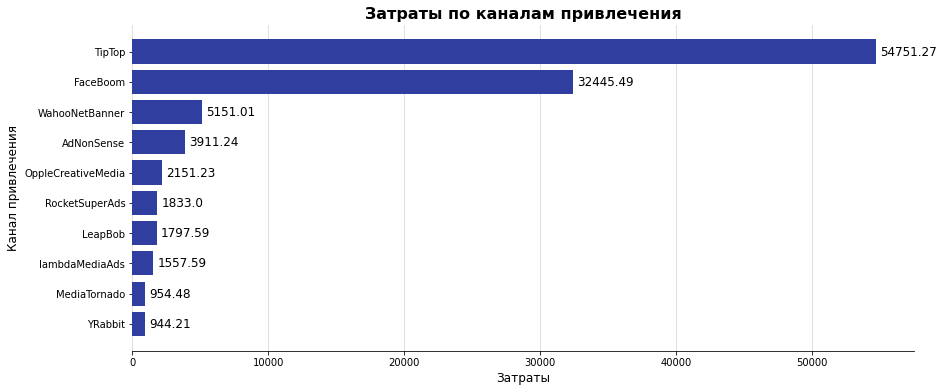

In [27]:
# построим диаграмму затрат по каналам привлечения
get_marketing_barh(
    data=marketing,
    col='total_costs',
    title='Затраты по каналам привлечения',
    margin=300
)

Общий бюджет на маркетинг за изучаемый период составил 105 500 у.е. Всего компания использовала 10 каналов привлечения, помимо органики. Большая часть бюджета на маркетинг уходит на два канала: TipTop и FaceBoom. На них приходится 52% и 31% всего бюджета на привлечение соответственно. Остальные источники получают не более 5% бюджета.

Но посмотрим на стоимость привлечения клиентов:

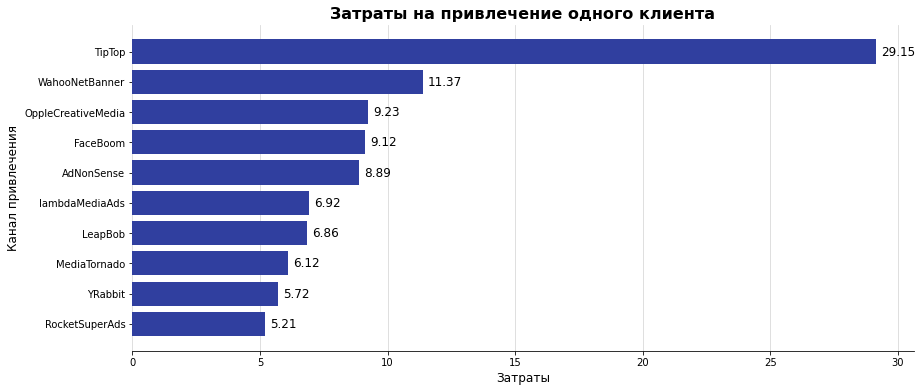

In [28]:
# создаем столбчатую диаграмму с ценой привлечения одного клиента
get_marketing_barh(
    data=marketing,
    col='cac',
    title='Затраты на привлечение одного клиента',
    margin=0.2
)

С огромным отрывом в стоимости привлечения клиента лидирует канал TipTop. На привлечение одного клиента тратится почти в 3 раза больше чем с канала, который располагается на 2-м месте. FaceBoom, лидер по числу привлеченных клиентов, располагается на 4-м месте, с ценой привлечения 9,12 у.е.

Зафиксируем результаты исследования стоимости привлечения клиента, но пока не будем делать выводы о выгоде того или иного канала. Говорить о выгоде и эффективности можно будет говорить после расчета LTV. Мы будем считать LTV на следующих этапах исследования.

## Изучение изменений затрат на привлечение во времени

Посмотрим сколько мы тратили на каждый канал привлечения на каждой неделе из отчета. Мы берем именно неделю, а не день, чтобы убрать шумы.

Создадим функцию для отрисовки линейного графика:

In [29]:
# функция для создания линейного графика
def get_line_plot(
    data, # датафрейм 
    title, # название графика
    loc,
    total=True# позиция легенды
):
    # строим график
    fig, ax = plt.subplots(figsize=(12,6))
    ax.set_title(title)
    if total:
        data.plot.area(
            ax=ax,
            legend=False,
            color=colors,
            zorder=2,
            alpha=0.7
        )
    else:
        data.plot(
            ax=ax,
            legend=False,
            color=colors,
            zorder=2,
        )
        
    ax.set_xlabel('Неделя', fontsize='large')
    ax.set_ylabel('Затраты', fontsize='large')

    # добавляем легенду сбоку
    fig.legend(data.columns,
               bbox_to_anchor=loc,
               frameon=False,
               fontsize='large')

Визуализируем динамику общих затрат и динамику стоимости привлечения одного пользователя по каналам привлечения.

Так как у нас есть 2 явных лидера, на которые приходится почти 80% всего бюджета, то для лучшей визуализации объединим все остальные каналы привлечения в один, под названием other.

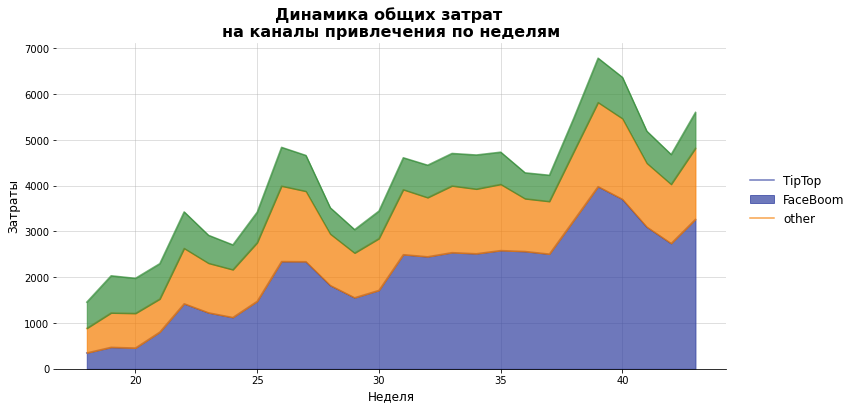

In [30]:
# создаем сводную таблицу с затратами по неделям
costs['week'] = costs['dt'].dt.isocalendar().week
costs_by_week = costs.pivot_table(
    index='channel',
    columns='week',
    values='costs',
    aggfunc='sum'
)

# делаем таблицу с двумя лидерами и суммированными остальными каналами
short_costs_by_week = costs_by_week.T[['TipTop', 'FaceBoom']]
short_costs_by_week['other'] = costs_by_week.T[[
    col for col in costs_by_week.T.columns if col not in ['TipTop', 'FaceBoom']]].sum(axis=1)

get_line_plot(
    data=short_costs_by_week,
    title='Динамика общих затрат \nна каналы привлечения по неделям',
    loc=(1.05, 0.6)
)


На графике видно, что все каналы привлечения начинали примерно с одной позиции в интервале от 400 у.е. до 600 у.е в неделю. Затем с 21-й недели пошел рост затрат на каналы FaceBoom и TipTop. А на 26-й TipTop вырвался в лидеры. Затем разрыв между TipTop и остальными каналами только увеличивался. 

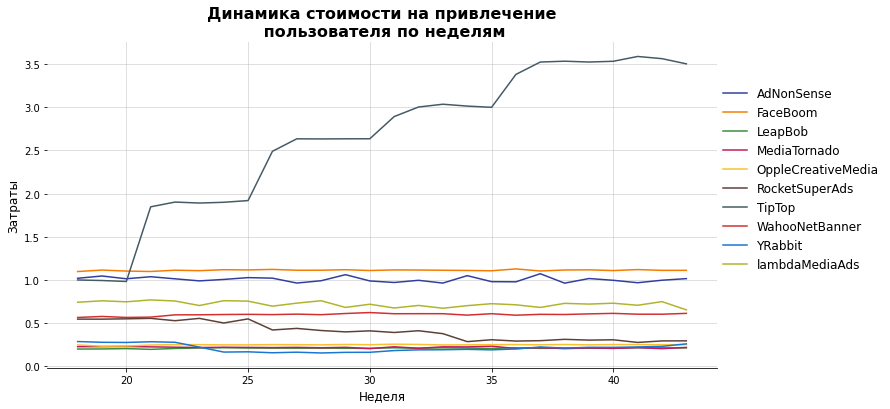

In [31]:
# создаем сводную таблицу со средней стоимостью привлечения по неделям
ac_by_week = (
    profiles.pivot_table(
        index='channel',
        columns='week',
        values='acquisition_cost',
        aggfunc='mean'
    ).T.drop(columns=['organic'])
)

get_line_plot(
    data=ac_by_week,
    title='Динамика стоимости на привлечение\n пользователя по неделям',
    loc=(1.1, 0.8),
    total=False
)

Большинство каналов имеют стабильную стоимость привлечения пользователей. Некоторые имеют совсем небольшие отклонения от недели к неделе. И только TipTop ступенчато растет каждый месяц, кроме последнего. Изначально этот канал привлечения был даже не самым дорогим, но из-за постоянного роста стоимости привлечения пользователей, на 40-й неделе он стоил почти в 3 раза дороже своего ближайшего преследователя.

## Выводы

На этом этапе мы изучали маркетинг Procrastinate Pro+. Мы Узнали сколько компания тратит на разные каналы привлечения, и во сколько в среднем обходится один пользователь и один клиент. 

После исследования у нас появилась зацепка, которая поможет выяснить причины убыточности. Наше предположение, что вся проблема в канале TipTop. Компания вкладывает в этот канал больше всего средств. Но у него самые большие стоимость привлечения пользователя и стоимость привлечения клиента. Для того, чтобы проверить это предположение, нам нужно посмотреть на ROI с этого канала, чем мы и займемся на следующем этапе.

При визуализации динамики стоимости привлечения пользователя мы заметили интересный паттерн у канала TipTop. Стоимость привлечения пользователя растет примерно каждые 5 недель, то есть каждый месяц. Пока сложно сказать с чем это связано, но мы обязательно поделимся этой информацией с маркетологами и узнаем в чем причина.

Вот еще дополнительные выводы, которые мы сделали:
* Компания использует 10 каналов привлечения пользователей. Но тратит 83% бюджета только на два: TipTop (52%) и FaceBoom (31%).
* Стоимость привлечения одного пользователя у канала TipTop в три раза больше чем в среднем по остальным каналам. Самый дешевый канал привлечения клиентов – RocketSuperAds (5.21 у.е.).
* В общих затратах на каналы привлечения видна небольшая сезонность. Периодически она синхронно растет, а потом синхронно падает. В общем же чем ближе к концу исследуемого периода, тем больше компания тратит на маркетинг.
* Для большинства каналов характерна стабильная стоимость привлечения пользователя. Только TipTop растет каждый месяц. За весь изучаемый период стоимость привлечения пользователя в этом канале выросла в 3 раза.

# Когортный анализ

Теперь, когда мы уже познакомились с данными, поняли кто наши пользователи, через какой канал попали к нам и сколько это стоило, можно приступать к когортному анализу. Цель этого анализа – понять почему компания терпит убытки.

Вводные для анализа:
* по бизнес-плану пользователи должны окупаться не позднее чем через 2 недели после привлечения.
* момент анализа – 01.11.2019.

## Создание функций для расчета метрик

В данном исследовании нас будут интересовать следующие метрики:
* Retention – удержание пользователей;
* Conversion Rate – коэффициент конверсии;
* LTV – сколько выручки приносит пользователь за все время использования продукта, или на определенный день "жизни";
* CAC – стоимость привлечения пользователей;
* ROI – возврат инвестиций;

Для каждой метрики создадим функцию, которая будет строить когортный анализ по соответствующей метрике.

### Функция для расчета Retention Rate

Retention – показывает какой процент пользователей продолжают пользоваться продуктом с течением времени.

Функция принимает на вход:
* `visits` – журнал сессий;
* `profiles` – профили пользователей;
* `observation_date` – момент анализа;
* `horizon_days` – горизонт анализа в днях;
* `ignore_horizon` – опция для игнорирования горизонта анализа, по умолчанию False;
* `dimensions` – дополнительные признаки по которым строится анализ, по умолчанию [];
* `period` – по какому периоду группируем данные, по умолчанию неделя (week).

Функция возвращает словарь в котором:
* **`retention_raw`** – пользовательские сессии объединенные с профилями;
* **`retention`** – таблица с показателями retention по соответствующим признакам;
* **`retention_in_time`** – таблица с динамикой retention по временным когортам с дополнительными параметрами.

In [32]:
# функция для расчета retention
def get_retention(
    visits,
    profiles,
    observation_date=datetime(2019, 11, 1).date(),
    horizon_days=14,
    ignore_horizon=False,
    dimensions=[],
    period='week'
):
    
    # исключим пользователей недоживших до горизонта анализа
    last_suitable_acqusition_date = observation_date
    if not ignore_horizon:
        last_suitable_acqusition_date = observation_date - dt.timedelta(days=horizon_days-1)
    result_raw = profiles.query('dt <= @last_suitable_acqusition_date')
    
    # объединяем профили с журналом сессий
    result_raw = result_raw.merge(
        visits[['user_id', 'session_start']],
        on='user_id',
        how='left'
    )
    
    # считаем лайфтайм
    result_raw['lifetime'] = (result_raw['session_start'] - result_raw['first_ts']).dt.days
    
    # столбец признака платящего пользователя остается всегда
    dimensions = ['payer'] + dimensions
    
    # функция для расчета retention по заданным параметрам
    def group_by_dimensions(df, dims, horizon):
        result = (
            result_raw.pivot_table(
                index=dims,
                columns='lifetime',
                values='user_id',
                aggfunc='nunique'
            ).fillna(0)
        )
        
        # считаем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
    
        # добавляем размеры когорт в результат
        result = cohort_sizes.merge(
            result,
            on=dims,
            how='left').fillna(0)
        
        # считаем retention
        result = result.div(result['cohort_size'], axis=0)[['cohort_size'] + list(range(horizon))]
        
        # возвращаем размеры когорт
        result['cohort_size'] = cohort_sizes
        
        return result
    
    # создаем таблицу retention
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    
    # создаем таблицу динамики retention
    result_in_time = group_by_dimensions(result_raw, dimensions + [period], horizon_days)
    
    # формируем вывод таблиц в виде словаря
    retention_dict = {
        'retention_raw': result_raw,
        'retention': result_grouped.round(4),
        'retention_in_time': result_in_time.round(4)
    }
    
    return retention_dict

### Функция для расчета Conversion Rate

Conversion Rate – метрика конверсии пользователя в какое-нибудь состояние. В нашем случае это переход в покупателя. 

Функция принимает на вход:
* `orders` – данные о покупках;
* `profiles` – профили пользователей;
* `observation_date` – момент анализа;
* `horizon_days` – горизонт анализа в днях;
* `dimensions` – список с дополнительными признаками, по которым происходит группировка, по умолчанию dimensions = [ ];
* `ignore_horizon` – опция для игнорирования горизонта анализа, по умолчанию False,
* `period` – по какому периоду группируем данные, по умолчанию неделя (week).

Функция возвращает словарь в котором:
* **`conversion_raw`** – профили объединенные с данными о первых покупках;
* **`conversion`** – таблица с показателями conversion по дополнительным признакам когорт;
* **`conversion_in_time`** – таблица с показателями conversion по временным когортам с дополнительными параметрами.

In [33]:
# Функция для расчета конверсии
def get_conversion(
    orders,
    profiles,
    observation_date=datetime(2019, 11, 1).date(),
    horizon_days=14,
    dimensions=[],
    ignore_horizon=False,
    period='week'
):
    
    # исключаем пользователей недоживших до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days=horizon_days-1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    
    # найдем дату первой покупки
    first_purchases = (
        orders.sort_values(['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )
    
    # объединяем данные о покупках с профилями
    result_raw = result_raw.merge(
        first_purchases,
        on='user_id',
        how='left'
    )
    
    # добавляем лайфтайм
    result_raw['lifetime'] = (result_raw['event_dt'] - result_raw['first_ts']).dt.days
    
    # группируем по dimensions
    if len(dimensions) == 0:
        result_raw['cohort'] = 'all_users'
        dimensions = ['cohort']
    
    # функция для группировки по dimensions
    def group_by_dimensions(df, dims, horizon):
        
        # группируем по дополнительным признакам
        result = (
            df.pivot_table(
                index=dims,
                columns='lifetime',
                values='user_id',
                aggfunc='nunique'
            )
        )
        
        # суммируем количество покупателей по каждой строке
        result = result.fillna(0).cumsum(axis=1)
            
        # вычислим размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        
        # объединяем размеры когорт и сгруппированные данные
        result = cohort_sizes.merge(
            result,
            on=dims,
            how='left'
        )
        
        # вычислим конверсию
        result = result.div(result['cohort_size'], axis=0)
        
        # восстановим размеры когорт
        result['cohort_size'] = cohort_sizes
        
        # оставляем только данные соответствующие горизонту анализа
        result = result[['cohort_size'] + list(range(horizon))]
        
        # переименуем столбцы
        result.columns = ['cohort_size'] + [int(i) for i in range(horizon)]
        
        return result
    
    # получим конверсию по dimensions 
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    
    # уберем группировку по всем пользователям
    if 'cohort' in dimensions:
        dimensions=[]
    dimensions += [period]
    
    # сгруппируем пользователей по когортам 
    result_in_time = group_by_dimensions(result_raw, dimensions, horizon_days)
    
    # формируем вывод таблиц в виде словаря
    conversion_dict = {
        'conversion_raw': result_raw,
        'conversion': result_grouped.round(4),
        'conversion_in_time': result_in_time.round(4)
    }
    
    return conversion_dict

### Функция для расчета LTV и ROI

LTV – метрика, которая показывает сколько выручки принес клиент на определенный день "жизни", либо за все время использования продукта.

ROI – метрика, которая показывает окупаемость инвестиции.

Функция принимает на вход:
* `orders` – данные о покупках;
* `profiles` – профили пользователей;
* `observation_date` – момент анализа;
* `horizon_days` – горизонт анализа в днях;
* `dimensions` – список с дополнительными признаками, по которым происходит группировка, по умолчанию dimensions = [ ];
* `ignore_horizon` – опция для игнорирования горизонта анализа, по умолчанию False;
* `period` – период группировки пользователей по времени, чтобы снизить шум.

Функция возвращает словарь в котором:
* **`ltv_raw`** – профили объединенные с данными о покупках;
* **`ltv`** – таблица показателей LTV по дополнительным признакам когорт;
* **`ltv_in_time`** – таблица LTV по временным когортам с дополнительными параметрами;
* **`roi`** – таблица показателей ROI по дополнительным признакам когорт;
* **`roi_in_time`** – таблица показателей ROI по временным когортам с дополнительными параметрами.

In [34]:
# Функция для расчета ltv
def get_ltv(
    orders,
    profiles,
    observation_date=datetime(2019, 11, 1).date(),
    horizon_days=14,
    dimensions=[],
    ignore_horizon=False,
    period='week'
):
    # исключаем недоживших до горизонта анализа пользователей
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days=horizon_days-1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
      
    # объединим данные о покупках с профилями пользователей
    result_raw = result_raw.merge(
        orders,
        on='user_id',
        how='left'
    )
        
    # рассчитаем лайфтайм пользователей
    result_raw['lifetime'] = (result_raw['event_dt'] - result_raw['first_ts']).dt.days
    
    # добавляем дефолтный дополнительный признак, если других не задано
    if len(dimensions) == 0:
        result_raw['cohort'] = 'all_users'
        dimensions = ['cohort']
    
    # функция для группировки по дополнительным признакам
    def group_by_dimensions(df, dims, horizon):
        
        # создаем таблицу ltv
        result = df.pivot_table(
            index=dims,
            columns='lifetime',
            values='revenue',
            aggfunc='sum'
        ).fillna(0).cumsum(axis=1)
        
        # рассчитаем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        
        # добавим размеры когорт в таблицу с ltv
        result = cohort_sizes.merge(
            result,
            on=dims,
            how='left'
        )
        
        # рассчитываем ltv для каждой когорты
        result = result.div(result['cohort_size'], axis=0)
        
        # восстанавливаем размер когорт
        result['cohort_size'] = cohort_sizes
        
        # оставляем только данные соответствующие горизонту анализа
        result = result[['cohort_size'] + list(range(horizon))]
        
        # переименуем столбцы
        result.columns = ['cohort_size'] + [int(i) for i in range(horizon)] 

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]
        
        return result, roi
    
    # создаем таблицу ltv
    result_grouped, roi_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)    
        
    # создаем таблицу динамики ltv    
    if 'cohort' in dimensions:
        dimensions = []
        
    dimensions += [period]
    result_in_time, roi_in_time = group_by_dimensions(result_raw, dimensions, horizon_days)
    
    # формируем результат
    ltv_roi_dict = {
        'ltv_raw': result_raw,
        'ltv': result_grouped.round(4),
        'ltv_in_time': result_in_time.round(4),
        'roi': roi_grouped,
        'roi_in_time': roi_in_time
    }    
    
    return ltv_roi_dict

## Создание функций для визуализации метрик

У нас уже есть функции для расчета метрик. Но на одни таблицы смотреть скучно, поэтому напишем также функции для визуализации метрик.

### Функция для визуализации Retention Rate

Есть 3 основных способа визуализации удержания пользователей:
* тепловая карта,
* кривые,
* динамика удержания.

Для того, чтобы делать все виды визуализации создадим 2 функции. Первая будет строить heatmap, а вторая кривые и динамику удержания. По умолчанию пользователи в retention делятся на платящих и неплатящих, поэтому каждый способ визуализации будет использован для обеих типов. Затем создадим функцию, которая будет вызывать две предыдущие и строить полную визуализацию.

Также создадим функцию для сглаживания линий на графике динамики.

In [35]:
# функция для сглаживания фрейма
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [36]:
# функция для построения heatmap для retention
def heatmap_plot_retention(retention):
    # определяем размеры фигуры
    plt.figure(figsize=(16, 10))
    
    # строим графики для платящих и неплатящих пользователей
    for is_payer in [True, False]:
        report = retention.query('payer == @is_payer').drop(columns=['cohort_size', 0])
        
        # выясняем является ли пользователь платящим
        if is_payer:
            ax=plt.subplot(211)
            ax.set_title('Удержание платящих пользователей')
        else:
            ax=plt.subplot(212)
            ax.set_title('Удержание неплатящих пользователей')
            
        sns.heatmap(
            report.droplevel('payer'),
            annot=True,
            fmt='.1%',
            ax=ax
        )
    # выводим графики
    plt.show()

In [37]:
# функция для построения линейных графиков для retention
def line_plot_retention(retention, retention_in_time, day=14, period='week'):

    # формируем данные для визуализации
    report = retention.drop(columns=(['cohort_size', 0]))

    # создаем фигуру
    plt.figure(figsize=(13,12))

    # функция для построения графиков удержания пользователей
    def plot_retention(report, ax_number, is_payer):

        # проверяем является ли пользователь клиентом
        if is_payer:
            ax=plt.subplot(ax_number)
            ax.set_title('Удержание среди\n платящих пользователей')
        else:
            ax=plt.subplot(ax_number, sharey=plt.subplot(ax_number-1))
            ax.set_title('Удержание среди\n неплатящих пользователей') 

        # сгладим график
        report = filter_data(report, 3)
        
        # строим график
        report.query('payer == @is_payer').T.plot(
            kind='line',
            ax=ax,
            legend=False
        )

    # функция для построения динамики удержания пользователей    
    def plot_retention_in_time(ax_number, is_payer, day):

        # получаем названия столбцов для сводной таблицы
        columns = [
            name
            for name in retention_in_time.index.names
            if name not in ['week', 'month', 'payer']
        ]

        # динамика удержания пользователей на определенный день
        report = retention_in_time.query('payer == @is_payer').pivot_table(
            index=period,
            columns=columns,
            values=day-1,
            aggfunc='mean'
        ) 
        
        # сгладим график
        report = filter_data(report, 15)

        # проверяем является ли пользователь клиентом
        if is_payer:
            ax=plt.subplot(ax_number)
            ax.set_title('Удержание платящих\n пользователей на {}-й день'.format(day))
        else:
            ax=plt.subplot(ax_number, sharey=plt.subplot(ax_number-1))
            ax.set_title('Удержание неплатящих\n пользователей на {}-й день'.format(day))     

        # строим графики
        report.plot(
            kind='line',
            ax=ax,
            legend=False
        )

    # строим графики
    plot_retention(report, 221, True)
    plot_retention(report, 222, False)
    plot_retention_in_time(223, True, day)
    plot_retention_in_time(224, False, day)
    
    # добавим общую легенду
    plt.legend( bbox_to_anchor=(1.5, 1.6),
                frameon=False, fontsize='large')
    plt.subplots_adjust(wspace=0.05, hspace=0.25)
    
    
    # выводим графики
    plt.show()

In [38]:
# функция для полной визуализации удержания
def plot_retention(retention, retention_in_time, days=14):
    heatmap_plot_retention(retention)
    line_plot_retention(retention, retention_in_time, days)

### Функция для визуализации Conversion Rate

Для визуализации конверсии будем использовать те же способы, что и при визуализации удержания. Но в конверсии нет стандартного деления на платящих и неплатящих пользователей, поэтому для визуализации достаточно будет одной функции. Данная функция возвращает: хитмэп, кривые и динамику конверсии.

In [39]:
# функция визуализации conversion rate
def plot_conversion(conversion, conversion_in_time, day=14, period='week'):

    # формируем отчет для хитмэпа и кривых
    report = conversion.drop(columns=['cohort_size', 0])

    # строим хитмэп
    plt.figure(figsize=(16,10))
    ax1 = plt.subplot(211)
    ax1.set_title('Хитмэп конверсии')
    sns.heatmap(
        report,
        annot=True,
        fmt='.1%'
    )
    
    plt.show()
    
    # строим кривые
    plt.figure(figsize=(13,5))
    ax2 = plt.subplot(121)
    ax2.set_title('Кривые конверсии')
    report.T.plot(
        ax=ax2,
        xlabel='лайфтайм',
        legend=False
    )

    # строим динамику конверсии
    columns = [
        name
        for name in conversion_in_time.index.names
        if name not in ['month', 'week', 'dt']
    ]
    
    # формируем датафрейм к визуализации динамики
    report = conversion_in_time.pivot_table(
        index=period,
        columns=columns,
        values=day-1,
        aggfunc='mean'
    )
    
    # сглаживаем данные
    report = filter_data(report, 5)
    
    # строим график
    ax3 = plt.subplot(122)
    ax3.set_title('Динамика конверсии')
    report.plot(
        ax=ax3,
        xlabel='Неделя',
        legend=False
    )
    
    # добавим общую легенду
    plt.legend(bbox_to_anchor=(1.05, 1),
                frameon=False, fontsize='large')
    plt.subplots_adjust(wspace=0.05, hspace=0.25)
    
    plt.show()

### Функция визуализации LTV, CAC и ROI

Метрики LTV, CAC и ROI взаимосвязаны, поэтому будем их визуализировать все вместе. Так как метрик много, то мы построим дашборд для их визуализации. Как и раньше, у нас есть три инструмента: хитмэп, кривые и динамика.

In [40]:
# функция для визуализации ltv, cac и roi
def plot_ltv_cac_roi(ltv, ltv_in_time, roi, roi_in_time, horizon=14, period='week'):

    # выбираем окно сглаживания
    if period == 'week':
        window = 7
        period_ru = 'Неделя'
    else:
        window = 1
        period_ru = 'Месяц'
    
    labels = ltv.index
    
    # функция для формирования отчета по которому будем строить динамику
    def get_report(df, cac=False):
        columns = [
            name
            for name in df.index.names
            if name not in ['month', 'week', 'dt']
        ]
        
        # если строим динамику по cac, то не используем горизонт анализа
        if cac:
            vals = 'cac'
        else:
            vals = horizon-1
        
        report = df.pivot_table(
            index=period,
            columns=columns,
            values=vals,
            aggfunc='mean'
        )
        
        return report
    
    # формируем таблицу динамики cac
    cac_in_time = roi_in_time[['cac']]
               
    # 1 строка – хитмэп LTV
    # создаем фигуру
    fig1 = plt.figure(figsize=(15, 25))
    
    # строим хитмэп LTV
    report = ltv.drop(columns=['cohort_size', 0])
    ax1 = plt.subplot(511)
    ax1.set_title('LTV')
    sns.heatmap(
        report,
        annot=True,
        fmt='.2'
    )
    
    # 2 строка – кривые и динамика LTV
    # создаем фигуру
    fig2 = plt.figure(figsize=(13, 25))
    
    # кривые LTV
    ax2 = plt.subplot(523)
    ax2.set_title('Кривые LTV')
    report.T.plot(
        ax=ax2,
        xlabel='Лайфтайм',
        ylabel='LTV',
        legend=False
    )
    
    # динамика LTV
    report = get_report(ltv_in_time)
    ax3 = plt.subplot(524, sharey=ax2)
    ax3.set_title('Динамика LTV на {}-й день'.format(horizon))
    filter_data(report, window).plot(
        ax=ax3,
        xlabel=period_ru,
        legend=False
    )
    
    # 3 строка – динамика стоимости привлечения
    report = get_report(cac_in_time, cac=True)
    ax4 = plt.subplot(513)
    ax4.set_title('Динамика стоимости привлечения')    
    filter_data(report, window).plot(
        ax=ax4,
        xlabel=period_ru,
        ylabel='CAC',
        legend=False
    ) 
    
    # настраиваем легенду и отступы
    fig2.legend([ax2, ax3, ax4], labels = labels, bbox_to_anchor=(1.09, 0.66),
                frameon=False, fontsize='large')
    plt.subplots_adjust(wspace=0.05, hspace=0.4)
    
    # 4 строка – хитмэп ROI
    # создаем фигуру
    fig3 = plt.figure(figsize=(15, 25))
    
    # строим хитмэп ROI
    report = roi.drop(columns=['cac', 'cohort_size', 0])
    ax5 = plt.subplot(514)
    ax5.set_title('ROI')
    sns.heatmap(
        report.round(3),
        annot=True,
        fmt='.1%'
    )
    
    # 5 строка – кривые roi и динамика roi
    # создаем фигуру
    fig4 = plt.figure(figsize=(13, 25))
    
    # кривые roi
    ax6 = plt.subplot(529)
    ax6.set_title('Кривые ROI')
    report.T.plot(
        ax=ax6,
        xlabel='Лайфтайм',
        ylabel='ROI',
        legend=False
    )
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')

    # динамика roi
    report = get_report(roi_in_time)
    ax7 = plt.subplot(5,2,10, sharey=ax6)
    ax7.set_title('Динамика ROI на {}-й день'.format(horizon))
    filter_data(report, window).plot(
        ax=ax7,
        xlabel=period_ru,
        legend=False
    ) 
    # добавляем линию уровня окупаемости
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    
    # добавляем легенду
    labels = [i for i in labels if i != 'organic'] + ['Уровень\nокупаемости']
    fig4.legend([ax6, ax7], labels = labels,
                bbox_to_anchor=(1.09, 0.28), frameon=False, fontsize='large')
    
    # устанавливаем отступы между графиками
    plt.subplots_adjust(wspace=0.05, hspace=0)
    
    # выводим фигуру
    plt.show()

## Оценка окупаемости рекламы

На этом этапе мы проведем следующие исследования.
* Оценка общей окупаемости рекламы,
* Оценка окупаемости рекламы по каналам привлечения,
* Оценка окупаемости рекламы по регионам.

Цель этих исследований – найти проблемы с окупаемостью.

Инструментом для поиска проблем будет дашборд с метриками LTV, CAC, ROI.

Так как мы будем изучать окупаемость пользователей, то нам незачем учитывать органических пользователей:

In [41]:
# обираем из анализа органических пользователей
profiles = profiles.query('channel != "organic"')

### Оценка общей окупаемости рекламы

Для начала поймем общую картину. Для этого изучим общую окупаемость рекламы без разбивки на когорты по дополнительным параметрам. Такая оценка поможет понять присутствует ли вообще явная проблема.

In [42]:
# словарь с показателями LTV, CAC, ROI
ltv = get_ltv(
    orders,
    profiles,
    dimensions=[],
)

# выведем ключи словаря
ltv.keys()

dict_keys(['ltv_raw', 'ltv', 'ltv_in_time', 'roi', 'roi_in_time'])

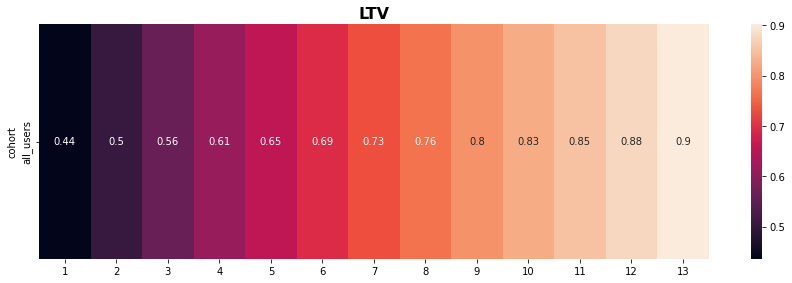

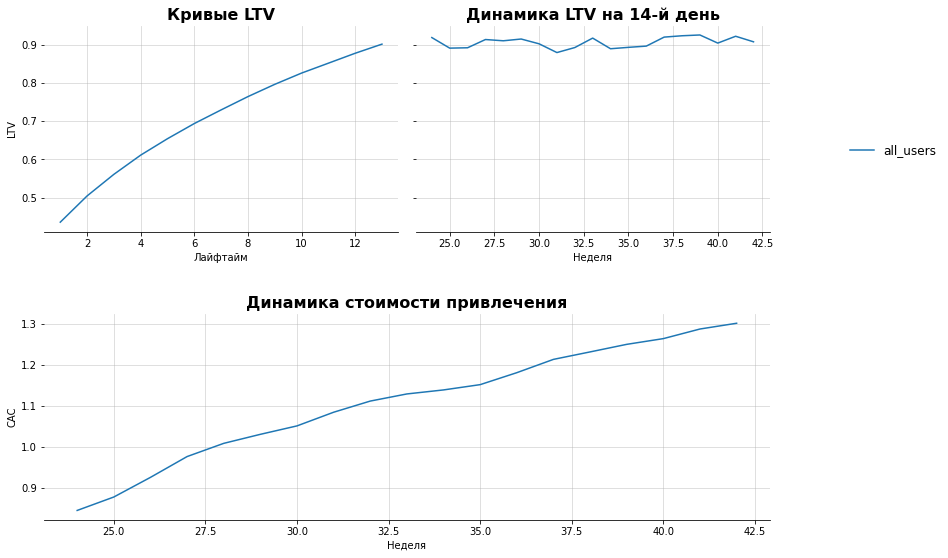

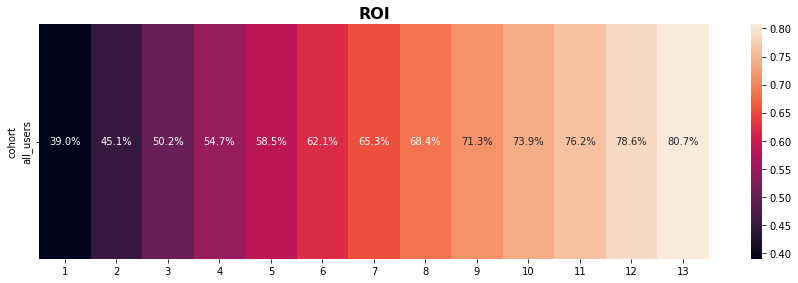

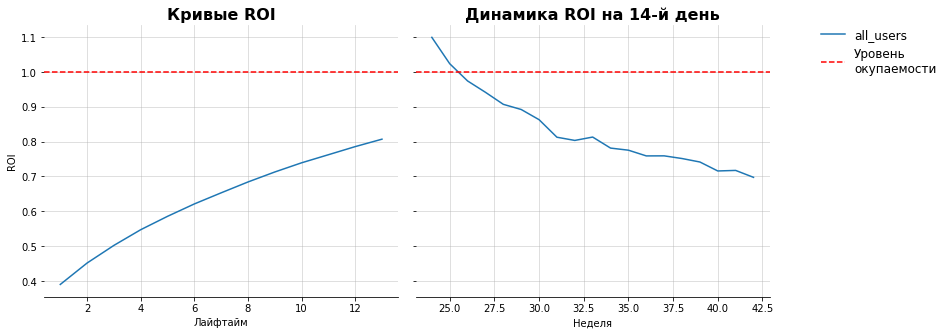

In [43]:
# визуализация LTV, CAC, ROI
plot_ltv_cac_roi(
    ltv['ltv'],
    ltv['ltv_in_time'],
    ltv['roi'],
    ltv['roi_in_time'],
    horizon=14,
    period='week'
)

В целом ситуация следующая:
* LTV на 14-й день примерно в 2 раза выше чем на 1-й день, и составляет 0.9
* По временным когортам LTV на 14-й день не сильно отличается от когорты к когорте.
* ROI 14-о дня – 80%. То есть мы зарабатываем на 14-й день меньше, чем тратим на привлечение пользователя.
* ROI был выше 100% у когорт 25-й и 26-й недели. Далее он тольео снижается. У когорты 42-й недели он около 70%

Проблема очевидна: пользователи стоят дороже, чем мы на них зарабатываем.

### Оценка окупаемости рекламы по каналам привлечения

Построим дашборд LTV, CAC и ROI с разбивкой по каналам привлечения.

In [44]:
# словарь с показателями ltv с разбивкой по каналам
ltv = get_ltv(
    orders,
    profiles,
    dimensions=['channel'],
)

# выведем ключи словаря
ltv.keys()

dict_keys(['ltv_raw', 'ltv', 'ltv_in_time', 'roi', 'roi_in_time'])

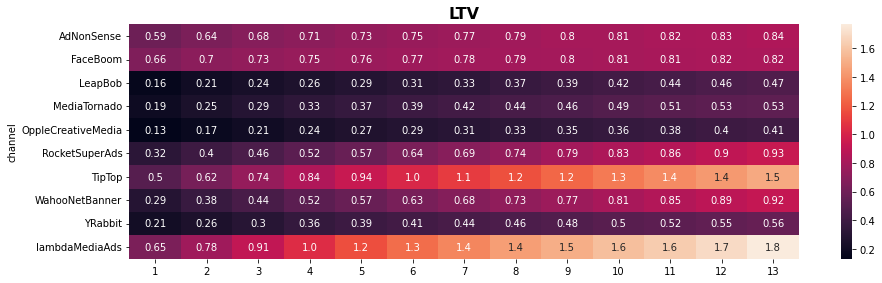

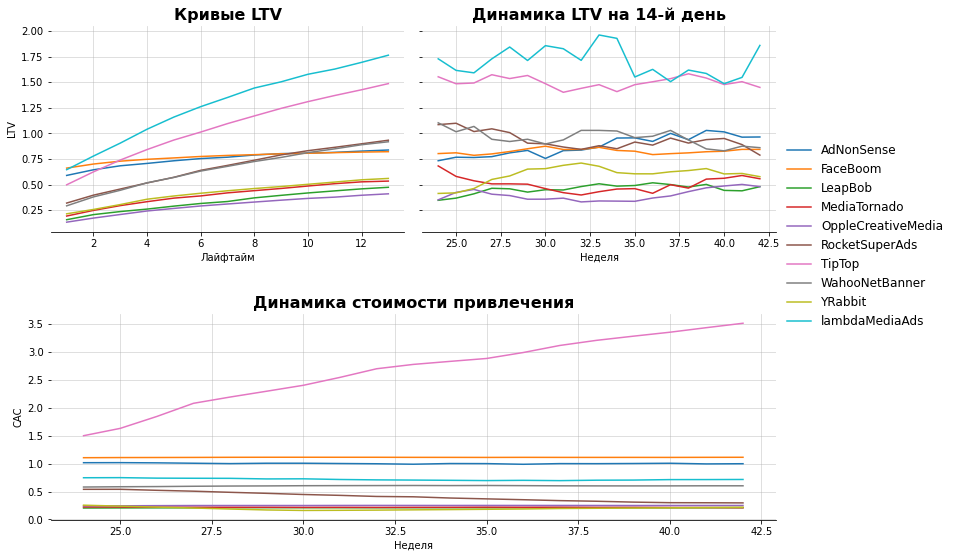

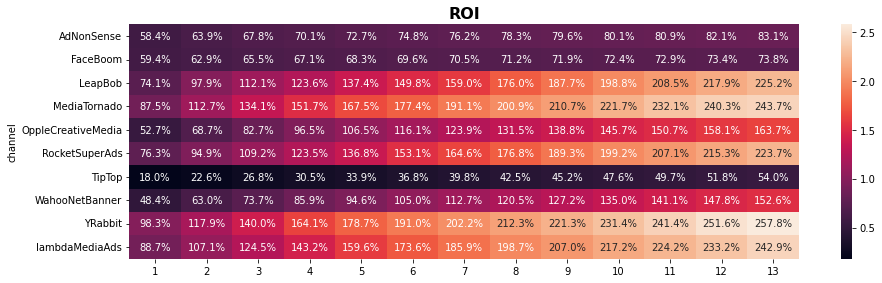

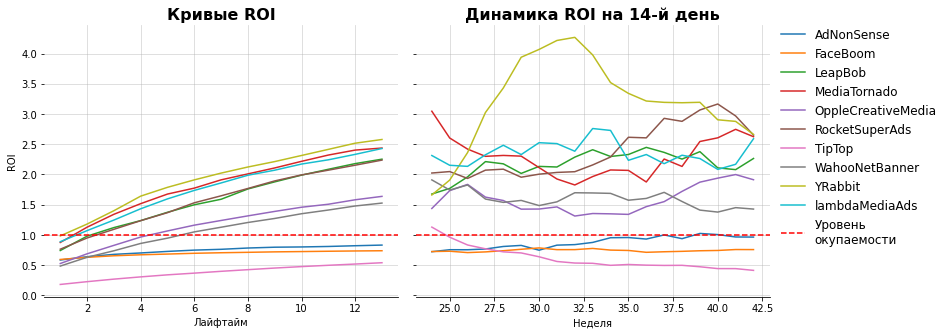

In [45]:
# визуализация LTV, CAC, ROI
plot_ltv_cac_roi(
    ltv['ltv'],
    ltv['ltv_in_time'],
    ltv['roi'],
    ltv['roi_in_time'],
    horizon=14,
    period='week'
)

По показателям LTV каналы привлечения можно разбить на 3 группы по прибыльности:
1. Группа самых прибыльных каналов: lambdaMediaAds, TipTop. В этих каналах показатели LTV от 1,5.
2. Группа средних по прибыльности каналов: RocketSuperAds, WahooNetBanner, FaceBoom, AdNonSense. В этой группе LTV в интервале от 0,82 до 0,93.
3. Группа самых низких по прибыльности: LeapBob, MediaTornado, OppleCreativeMedia, YRabbit, organic. Среди этих каналов потолок LTV – 0,56.

Самый большой рост среди каналов за 14 дней у lambdaMediaAds. У этого канала на 14-й день LTV почти в 3 раза больше чем на 1-й день. Подобный рост показывает и TipTop. Но большинство каналов наращивают LTV очень слабо. Канал FaceBoom вообще почти не растёт. На первый день его показатель LTV был 0,66, а на 14-й день 0,82. Похоже, что пользователи делают покупки лишь в первый день. Возможно здесь есть проблемы с удержанием. Но в этом мы разберемся далее.

Очень тревожный рост стоимости привлечения виден у TipTop. За время исследования стоимость привлечения выросла более чем в 2 раза с 1,5 до 3,5. У остальных каналов стоимость стабильная.

По показателям ROI лидеры LeapBob, MediaTornado, RocketSuperAds, YRabbit, lambdaMediaAds. У этих каналов ROI от 223% до 257%. 3 канала на 14-й день так и не окупились. Вот эти каналы: AdNonSense, FaceBoom и TipTop. Причем, если посмотреть на динамику ROI по когортам, то TipTop был рентабелен на первой неделе, а затем был постоянный спад. AdNonSense, наоборот, в последних когортах стал приближаться к окупаемости. А вот FaceBoom на протяжении всего периода был стабильно ниже уровня окупаемости.

Зафиксируем: проблемы есть в 3-х каналах AdNonSense, FaceBoom и TipTop. По предыдущим шагам мы помним, что это три канала в которые вкладывается больше всего средств.

Посмотрим связаны ли потери с регионом.

### Оценка окупаемости рекламы по регионам

С проблемными каналами мы разобрались. Теперь посмотрим на показатели по регионам.

In [46]:
# словарь с показателями ltv с разбивкой по каналам
ltv = get_ltv(
    orders,
    profiles,
    dimensions=['region'],
)

# выведем ключи словаря
ltv.keys()

dict_keys(['ltv_raw', 'ltv', 'ltv_in_time', 'roi', 'roi_in_time'])

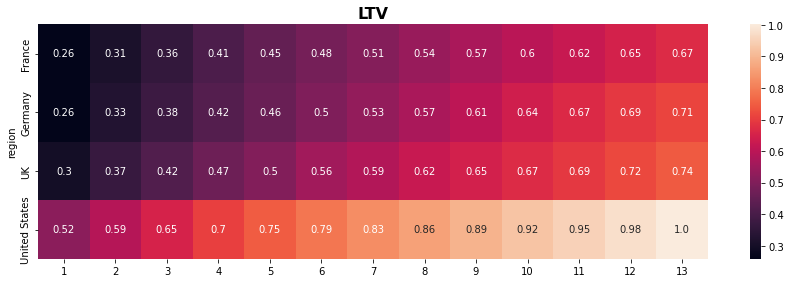

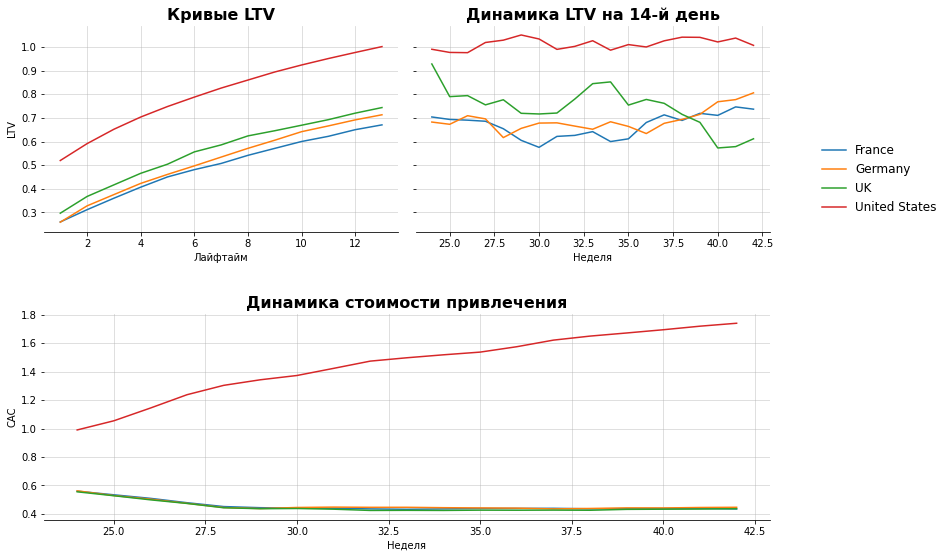

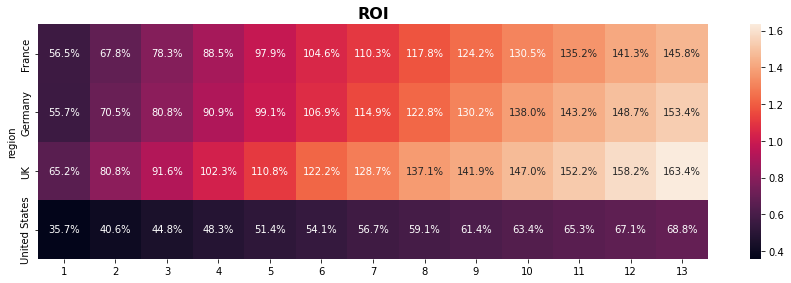

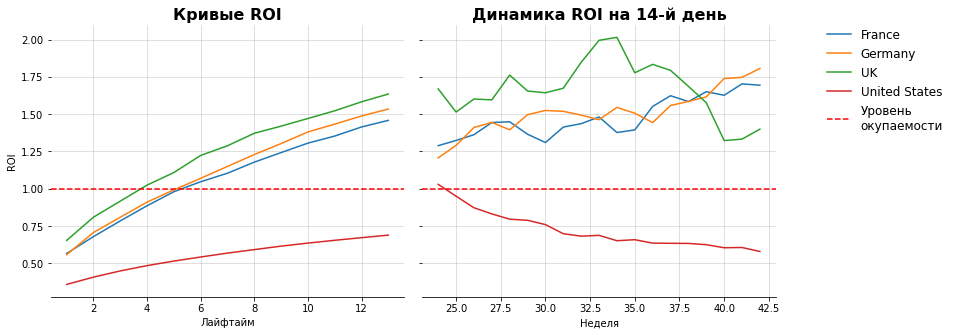

In [47]:
# визуализируем данные
plot_ltv_cac_roi(
    ltv['ltv'],
    ltv['ltv_in_time'],
    ltv['roi'],
    ltv['roi_in_time'],
    horizon=14,
    period='week'
)

Из графиков видно:
* Самый высокий LTV у пользователей из США – 1.0, а самый низкий у Франции – 0.67. 
* LTV пользователей из США на протяжении всего периода исследования остается плюс минус на одном уровне. При этом стоимость привлечения постоянно растет. То есть это постепенно снижает ROI.
* У Англии заметны проблемы с LTV. В первой когорте он был более 0.9, а в последней стал чуть выше 0.6. Это также отражается на уровне ROI.
* У каналов привлечения из Европы до 28-й недели снижалась стоимость привлечения пользователя, а затем была неизменной до конца исследования.
* Единственная страна в которой общий ROI ниже 100% – это США. На 14-й день он составляет лишь 68%. ROI выше 100% У пользователей из США, был только на 24-й неделе. Затем он неизменно снижался, и на последней неделе составлял уже примерно 60%.
* Также видны проблемы и у Англии. Несмотря на то что ROI у этого региона так и не вышел за уровень окупаемости, но на пике он составлял около 200%, но потом начал резко снижаться и закончил на отметке около 140%.
* Хорошо себя показали ROI Германия и Франция. На протяжении всего исследования они медленно, но постепенно росли. В когорте первой недели ROI этих стран был около 125%,  закончили они на отметке примерно 175%.


На этом графике мы обнаружили еще две проблемы: стабильная убыточность пользователей из США и падение показателей у Англии. Так как большинство пользователей пришло из США, то в целом убыточность компании можно приписать проблемам маркетинга в этом регионе.

Объединим знания о проблемных каналах и странах. Создадим сводную таблицу с распределением пользователей по каналам и странам:

In [48]:
# распределение проблемных каналов по регионам
(
    profiles
    .query('channel in ["FaceBoom", "TipTop", "AdNonSense"]')
    .pivot_table(
        index='region',
        columns='channel',
        values='user_id',
        aggfunc='nunique'
    )
    .fillna(0)
)

channel,AdNonSense,FaceBoom,TipTop
region,,,
France,1366.0,0.0,0.0
Germany,1219.0,0.0,0.0
UK,1295.0,0.0,0.0
United States,0.0,29144.0,19561.0


Вот мы окончательно и локализовали проблемы. Нет проблемных регионов, есть проблемные каналы. TipTop и FaceBoom задействованы только в США, а AdNonSense только в Европе.

Теперь нужно понять из-за чего возникают проблемы, для этого посмотрим на показатели удержания и конверсии.

## Оценка удержания и конверсии

### Оценка удержания пользователей

Посмотрим на удержание пользователей по каналам.

In [49]:
# создадим словарь с показателями удержания
retention = get_retention(
    visits,
    profiles,
    horizon_days=14,
    dimensions=['channel'],
)

# выведем ключи словаря
retention.keys()

dict_keys(['retention_raw', 'retention', 'retention_in_time'])

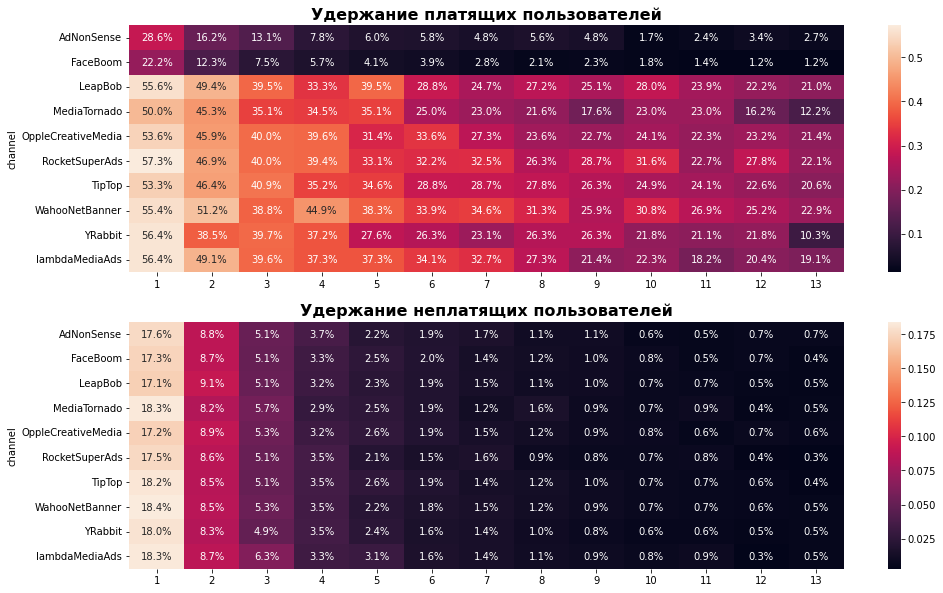

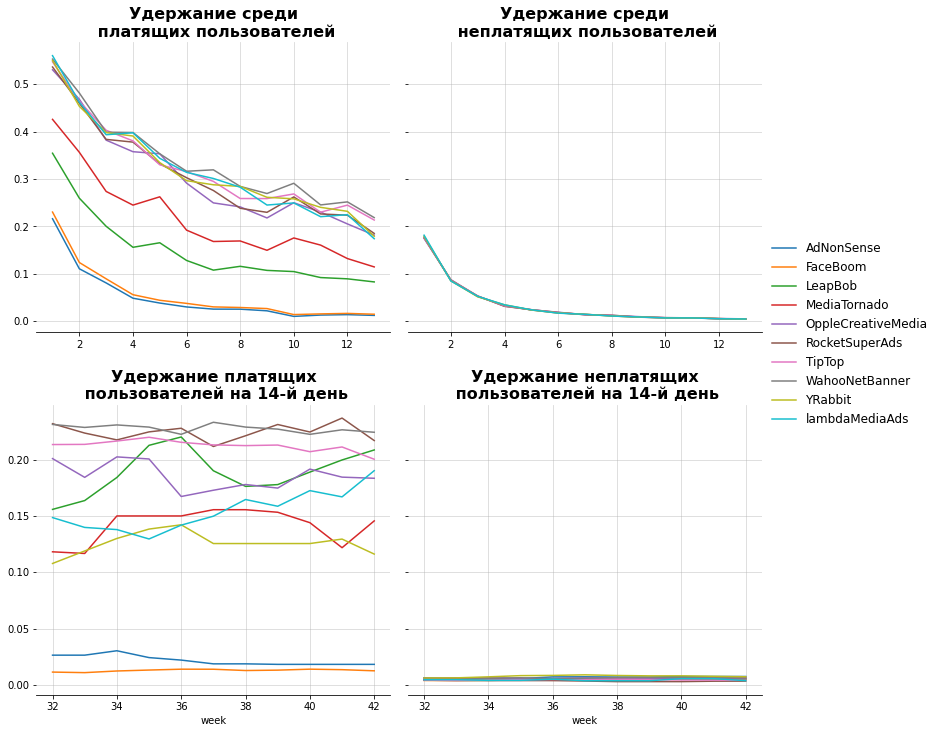

In [50]:
# визуализируем retention
plot_retention(
    retention['retention'],
    retention['retention_in_time']
)

Из визуализации становится очевидна проблема FaceBoom и AdNonSense. У них самый низкий retention среди всех каналов. Удержание на 14-й день среди платящих пользователей у FaceBoom равна 1,2%, а у AdNonSense 2,7%. Для сравнения среднее значение по остальным каналам среди платящих пользователей около 20%. Также относительно низкий retention у YRabbit и MediaTornado, 10% и 12% соответственно.

Причем низкие показатели FaceBoom и AdNonSense были такими у всех временных когорт. Маркетологам следовало обратить на это внимание и вовремя скорректировать рекламную кампанию.

### Оценка конверсии

In [51]:
# создадим словарь с показателями конверсии
conversion = get_conversion(
    orders,
    profiles,
    horizon_days=14,
    dimensions=['channel'],
)

# выведем ключи словаря
conversion.keys()

dict_keys(['conversion_raw', 'conversion', 'conversion_in_time'])

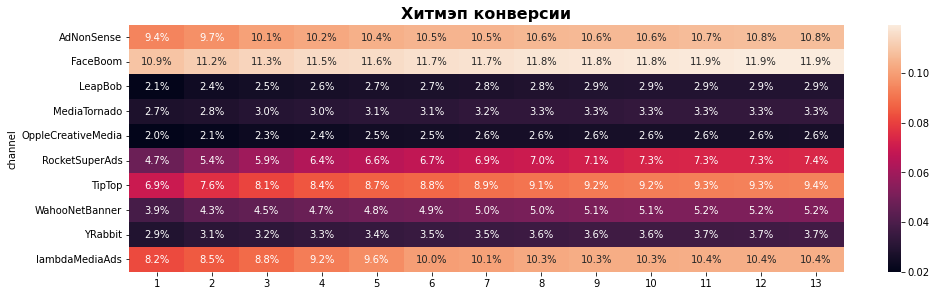

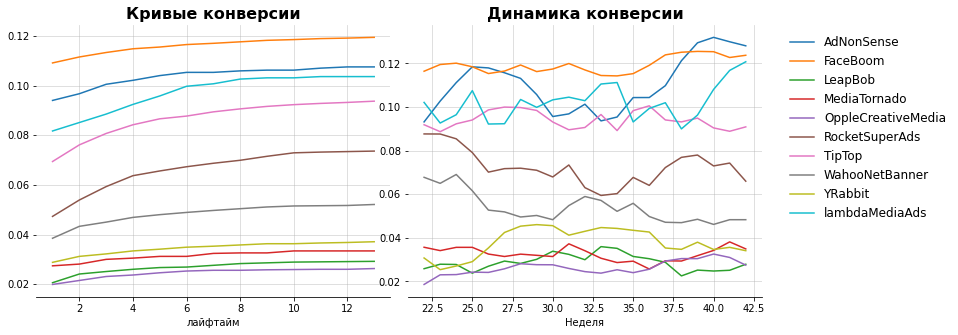

In [52]:
# визуализируем конверсию
plot_conversion(
    conversion=conversion['conversion'],
    conversion_in_time=conversion['conversion_in_time']
)

У проблемных каналов, с точки зрения удержания, с конверсией все в порядке. Низкая конверсия видна у каналов LeapBob, MediaTornado, OppleCreativeMedia, YRabbit. Их конверсия сопоставима с органическими пользователями.

у AdNonSense и lambdaMediaAds виден рост конверсии 14-о дня ближе к моменту анализа. RocketSuperAds и WahooNetBanner напротив со временем теряют в показателе конверсии.

### Conversion vs Retention

Перед тем как приступать к выводам, поместим конверсию и удержание на одну плоскость и прокомментируем результат.

In [53]:
# получим данные по конверсии и удержанию пользователей
conv = conversion['conversion'][['cohort_size', 13]]
ret = retention['retention'].reset_index().query('payer == True').set_index('channel')[13]

# соединим данные в единый отчет
report = conv.merge(
    ret,
    on=conv.index,
    how='left'
)

# переименуем столбцы
report.columns=['channel', 'cohort_size', 'conversion', 'retention']

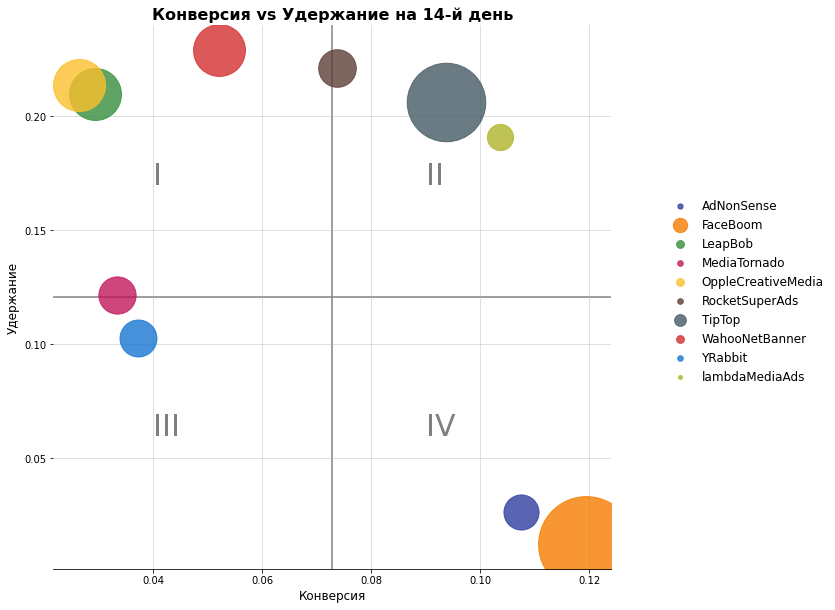

In [54]:
# диаграмма рассеивания для конверсии и удержания
fig, ax = plt.subplots(figsize=(10,10))

# наводим красоту
ax.set_title('Конверсия vs Удержание на 14-й день')
ax.set_xlabel('Конверсия', size='large')
ax.set_ylabel('Удержание', size='large')
ax.grid(True)

# добавляем точки на оси
for color, label in enumerate(report['channel'].unique()):
    x = report.query('channel == @label')['conversion']
    y = report.query('channel == @label')['retention']
    scale = report.query('channel == @label')['cohort_size']
    ax.scatter(
        x=x,
        y=y,
        s=scale / 3,
        color=colors[color],
        alpha=0.8,
        zorder=2,
        label=label
    )

# добавляем легенду
ax.legend(
    bbox_to_anchor=[1.4, 0.7],
    frameon=False,
    fontsize='large',
    markerscale=0.15
)

# добавляем линии
y_line = report['retention'].min() + (report['retention'].max() - report['retention'].min()) / 2
plt.axhline(y=y_line, color='grey', zorder=1)

x_line = report['conversion'].min() + (report['conversion'].max() - report['conversion'].min()) / 2
plt.axvline(x=x_line, color='grey', zorder=1)

# добавим подписи квадратов
ax.text(
    x=0.04,
    y=0.17,
    s='I',
    size=30,
    zorder=1,
    color='grey'
)

ax.text(
    x=0.09,
    y=0.17,
    s='II',
    size=30,
    zorder=1,
    color='grey'
)

ax.text(
    x=0.04,
    y=0.06,
    s='III',
    size=30,
    zorder=1,
    color='grey'
)

ax.text(
    x=0.09,
    y=0.06,
    s='IV',
    size=30,
    zorder=1,
    color='grey'
)

plt.show()

Мы разместили каналы по квадратам в соответствии с показателями конверсии и удержания. Размер пузыря отражает размер когорты, с учетом неплатящих пользователей.

Прокомментируем каждый квадрат.

* I – сюда вошли каналы, в которых высокое удержание и низкая конверсия. Нужно изучить почему пользователи продолжают пользоваться продуктом, но не покупают. Вполне возможно им хватает бесплатной функциональности. Но возможно, что есть какой-то фактор, который останавливает их от покупки.
* II – самые выгодные для нас пользователи. У них высокий уровень конверсии и удержания. Нужно понять, что им нравится в продукте, что их заставляет покупать и пользоваться продолжительное время.
* III – проблемные пользователи. Здесь пользователи с низкими показателями как конверсии, так и удержания. Тут явно нужно что-то менять. Возможно это просто не наши пользователи, у них нет потребности в нашем продукте и мы зря тратим на них рекламный бюдет.
* IV – пользователи с высокой конверсией и низким удержанием. Можно предположить, что эти пользователи либо решают свою сиюминутную задачу, либо они купили и не получили пользы от покупки. Нужно изучить их показатели удовлетворенности.

Проблемные каналы FaceBoom и AdNonSense попали как раз в 4-й квадрат. Потенциально это выгодные для нас пользователи. Нужно изучить почему они так быстро перестают пользоваться нашим продуктом.

### Конверсия и удержание по устройствам

Проверим, есть ли проблемы с конверсией и удержанием на конкретных устройствах. Для этого сделаем хитмэпы с показателями разбитыми по устройствам.

Text(105.0, 0.5, 'Канал привлечения')

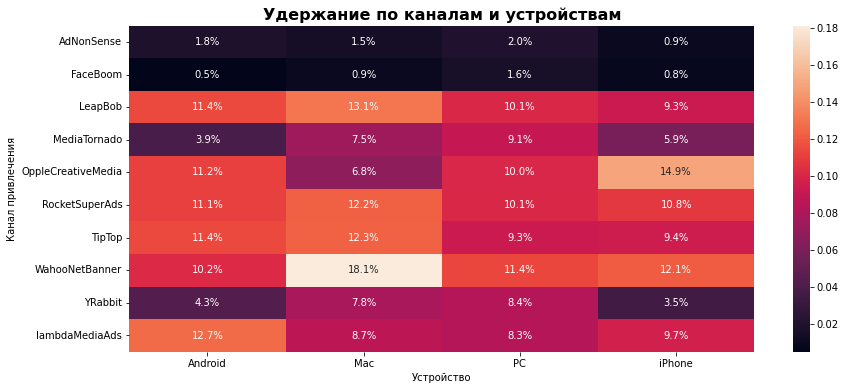

In [55]:
# создадим словарь с показателями удержания
retention = get_retention(
    visits,
    profiles,
    horizon_days=14,
    dimensions=['channel', 'device'],
)

# подготовим датафрейм к визуализации
df = retention['retention'].reset_index()[['channel', 'device', 13]]
df = df.pivot_table(
    index='channel',
    columns='device',
    values=13
)

# строим график
fig, ax = plt.subplots()
ax.set_title('Удержание по каналам и устройствам')
sns.heatmap(
    df,
    annot=True,
    fmt='.1%',
)
ax.set_xlabel('Устройство')
ax.set_ylabel('Канал привлечения')

Из графика видно:
* Из каналов MediaTornado и YRabbit пользователи лучше удерживаются с компьютеров, по сравнению с мобильными устройствами.
* Лучшее удержание у пользователей Mac из канала WahooNetBanner

Text(105.0, 0.5, 'Канал привлечения')

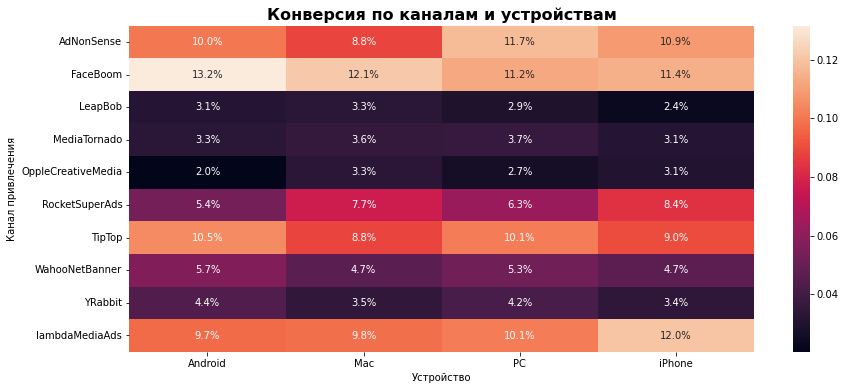

In [56]:
# создадим словарь с показателями конверсии
conversion = get_conversion(
    orders,
    profiles,
    horizon_days=14,
    dimensions=['channel', 'device'],
)

# готовим датафрейм к визуализации
df = conversion['conversion'].reset_index()[['channel', 'device', 13]]
df = df.pivot_table(
    index='channel',
    columns='device',
    values=13
)

# строим график
fig, ax = plt.subplots()
ax.set_title('Конверсия по каналам и устройствам')
sns.heatmap(
    df,
    annot=True,
    fmt='.1%'
)
ax.set_xlabel('Устройство')
ax.set_ylabel('Канал привлечения')

Конверсия по устройствам распределена более менее равномерно. лишь у RocketSuperAds заметно что лучше конвертируют пользователи устройст Apple.

## Выводы

Коротко напомним, что мы изучили на этом этапе:
1. Провели оценку общей окупаемости,
2. Провели оценку окупаемости по каналам привлечения,
3. Провери оценку окупаемости по регионам,
4. Посмотрели на удержание пользователей по каналам привлечения,
5. Посмотрели на конверсию пользователей по каналам привлечения,
6. Изучили показатели удержания и конверсии по устройствам.

Мы обнаружили 3 проблемные канала: FaceBoom, TipTop, AdNonSense. Каналы FaceBoom и TipTop привлекают пользователей из США, а канал AdNonSense из Европы.

Прокомментируем каждый проблемный канал:

**FaceBoom**. Данный канал ниже уровня окупаемости на 14-й день для всех временных когорт пользователей. Проблему этого канала мы обнаружили при изучении удержания. Пользователи с FaceBoom очень хорошо конвертируются в клиентов, но слишком быстро уходят из продукта.

**AdNonSense**. У этого канала история похожая на FaceBoom. Здесь также пользователи покупают платные услуги продукта, но потом в него не заходят. Но здесь есть и положительный момент. Показатель ROI медленно, но постепенно растет и у самых свежих временных когорт он уже подбирается к уровню окупаемости.

**TipTop**. У TipTop другая проблема. Здесь все в порядке с удержанием и конверсией. Но вот стоимость привлечения пользователей растет с каждой новой временной когортой. И уже в первых когортах из-за этого роста, канал выходит за уровень окупаемости.

# Общие выводы

### Данные и предобработка

В целом данные для анализа оказались хорошими. Перед исследованием мы исправили лишь 2 момента: типы данных в столбцах с датами и названия столбцов. Даты мы привели к типу datetime. А названия перевели в нижний регистр и убрали пробелы. Также мы проверили данные на наличие явных дубликатов и их не оказалось.

### Результат исследования

Цель исследования была ответить на вопрос: "почему компания убыточна?". Общий ответ: потому что на 14-й день пользователи приносят меньше денег, чем было потрачено на их привлечение. Причиной этому стали 3 канала: TipTop, FaceBoom, AdNonSense. Пользователи пришедшие из этих каналов на 14-й день показывают ROI ниже 100%. 

Причины убыточности этих каналов разные:
* TipTop – из-за роста стоимости привлечения пользователей. Если у первой когорты стоимость привлечения была 1.5, то у последней она была уже 3.5. LTV же оставался примерно на одном уровне. Нужно посмотреть есть ли возможность снизить CAC, либо увеличить LTV.
* FaceBoom и AdNonSense – из-за низкого показателя удержания. Их показатели 1.2% и 2.7 соответственно. Показатели на таком уровне были у всех временных когорт. При этом показатели конверсии у этих каналов одни из самых высоких: 10.8% у AdNonSense и 11.9% у FaceBoom. То есть пользователи хорошо покупают продукт, но затем перестают им пользоваться. Возможно реклама в этих каналах не соответствует действительности и пользователи после покупки разочаровываются. Нужно посмотреть на рекламные предложения с этих каналов и изнать показатель удовлетворенности продуктом. 

И при всех этих проблемах, компания вкладывает 85% своего бюджета на рекламу в эти каналы. И чем ближе к моменту анализа, тем больше компания вкладывает в них. В итоге на последней неделе затраты на эти каналы были в 5 раз больше, чем на первой неделе. А вот траты на другие каналы остались на прежнем уровне.

### Дополнительные результаты

**Выводы о пользователях:**
* Две третих пользователей пришло из США, остальные распределились довольно-таки равномерно среди Великобритании, Франции и Германии. Среди клиентов наблюдается похожая картина.
* iPhone – лидер среди устройств и у пользователей, и у клиентов. Дальше с отставанием более чем в 10 п.п. идут – Android, PC, Mac. Andriod прочно занимает второе место среди пользователей и клиентов. А вот PC, по сравнению с Mac, привлекает больше пользователей, но заметно меньше клиентов. Поэтому мы можем сделать предположение, что более платежеспособная аудитория пользуется Mac.
* Всего у нас 11 каналов привлечения. Среди каналов привлечения есть 3 однозначных лидера: organic, FaceBoom, TipTop. Доля этих трех каналов привлечения 70% у пользователей и 75% у клиентов. Из остальных 8 каналов ни один не набирает более 7% среди пользователей и клиентов.

**Выводы о маркетинге:**
* Общая сумма затрат на маркетинг за исследуемый период: 105 497.
* Всего у компании 10 каналов привлечения пользователей.
* 85% общего бюджета уходит на 3 убыточных канала: TipTop, FaceBoom и AdNonSense. Первые два используются для пользователей из США, последний для пользователей из Европы.
* Медианная стоимость привлечения одного клиента: около 8 у.е. Но среди каналов есть один явный выброс – TipTop. Чтобы привлечь 1 клиента, компания тратит 29 у.е.
* Чем ближе к моменту анализа данных, тем больше компания тратит на привлечение пользователей. На первой неделе расходы были около 1500, а на последней примерно 5500.

**Выводы об окупаемости рекламы:**
* За все время исследования общий ROI по всем каналам был выше 100% лишь 1 раз – в первую неделю.
* LTV каналов TipTop и lambdaMediaArts на 14-й день в 3 раза больше чем на 1-й. В абсолютных значениях это: 1.5 и 1.8 соответственно. Это лидеры по показателю LTV.
* Показатель CAC у большинства каналов остается одинаковым на протяжении всего периода исследования. Лишь у канала TipTop этот показатель вырос с 1.5 в начале до 3.5 в конце исследования.
* На графике динамики ROI по временным когортам виден "горб" с пиком в 400% у YRabbit. Это самый высокий показатель среди всех когорт.
* LTV пользователей из США на протяжении всего периода исследования остается плюс минус на одном уровне. При этом стоимость привлечения постоянно растет. То есть это постепенно снижает ROI.
* У Англии заметны проблемы с LTV. В первой когорте он был более 0.9, а в последней стал чуть выше 0.6. Это также отражается на уровне ROI.
* Хорошо себя показали ROI Германия и Франция. На протяжении всего исследования они медленно, но постепенно росли. В когорте первой недели ROI этих стран был около 125%, закончили они на отметке примерно 175%.

**Выводы об удержании и конверсии:**
* У большинства каналов показатель удержания 14-о дня в диапазоне от 20% до 22%. MediaTornado и YRabbit имеют показатели 12.2% и 10.3% соответственно. Самые низкие показатели у AdNonSense и FaceBoom – 2.7% и 1.2% соответственно.
* В конверсии ситуация обратная: у AdNonSense, FaceBoom и lambdaMediaAds показатель более 10%. Есть 2 канала среднячка – RocketSuperAds и TipTop, с показателями 7.4% и 9.4% соответственно. Диапазон значений среди остальных каналов от 2.6% до 5.2%